# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("data/temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41
...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,47
344,2016,12,28,Wed,42,47,45.3,48,58
345,2016,12,29,Thurs,47,48,45.3,48,65
346,2016,12,30,Fri,48,48,45.4,57,42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


In [4]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [5]:
df['week']

0        Fri
1        Sat
2        Sun
3        Mon
4       Tues
       ...  
343     Tues
344      Wed
345    Thurs
346      Fri
347      Sat
Name: week, Length: 348, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['week_int'] = le.fit_transform(df['week'])
df

,year,month,day,week,temp_2,temp_1,average,actual,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,29,0
1,2016,1,2,Sat,44,45,45.7,44,61,2
2,2016,1,3,Sun,45,44,45.8,41,56,3
3,2016,1,4,Mon,44,41,45.9,40,53,1
4,2016,1,5,Tues,41,40,46.0,44,41,5
...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,47,5
344,2016,12,28,Wed,42,47,45.3,48,58,6
345,2016,12,29,Thurs,47,48,45.3,48,65,4
346,2016,12,30,Fri,48,48,45.4,57,42,0


In [7]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,True,False
344,False,False,False,False,False,False,True
345,False,False,False,False,True,False,False
346,True,False,False,False,False,False,False


In [8]:
my_week = {
    "Mon":1,
    "Tues":2,
    "Wed":3,
    "Thurs":4,
    "Fri":5,
    "Sat":6,
    "Sun":7
}

df['week_int'] = df['week'].replace(my_week)
df.head()

/tmp/ipykernel_78100/3422108452.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week_int'] = df['week'].replace(my_week)


,year,month,day,week,temp_2,temp_1,average,actual,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,29,5
1,2016,1,2,Sat,44,45,45.7,44,61,6
2,2016,1,3,Sun,45,44,45.8,41,56,7
3,2016,1,4,Mon,44,41,45.9,40,53,1
4,2016,1,5,Tues,41,40,46.0,44,41,2


In [9]:
df['autumn'] = np.where(df['month'].isin([10,11,12]), 1, 0)
df['winter'] = np.where(df['month'].isin([1,2,3]), 1, 0)
df['spring'] = np.where(df['month'].isin([4,5,6]), 1, 0)
df['summer'] = np.where(df['month'].isin([7,8,9]), 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend,week_int,autumn,winter,spring,summer
0,2016,1,1,Fri,45,45,45.6,45,29,5,0,1,0,0
1,2016,1,2,Sat,44,45,45.7,44,61,6,0,1,0,0
2,2016,1,3,Sun,45,44,45.8,41,56,7,0,1,0,0
3,2016,1,4,Mon,44,41,45.9,40,53,1,0,1,0,0
4,2016,1,5,Tues,41,40,46.0,44,41,2,0,1,0,0


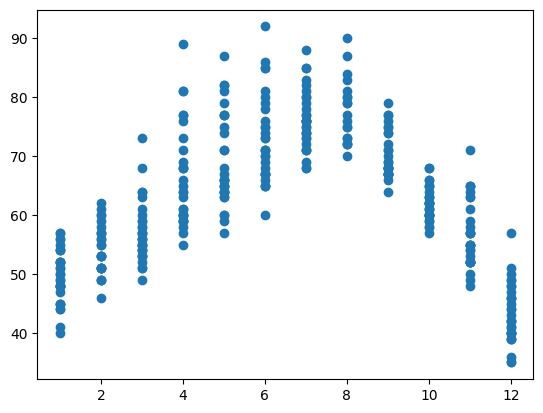

In [10]:
plt.scatter(df['month'], df['actual'])

In [11]:
df.corr(numeric_only=True)

,year,month,day,temp_2,temp_1,average,actual,friend,week_int,autumn,winter,spring,summer
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529,0.048145,-0.004352,0.772310,-0.745591,-0.251591,0.228408
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675,0.024592,0.010433,0.011340,0.004328,0.010594,-0.027626
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835,0.583758,0.011480,-0.382375,-0.458992,0.331928,0.531575
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880,0.541282,-0.012466,-0.391054,-0.447745,0.333996,0.526819
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365,0.689278,-0.002848,-0.434943,-0.523831,0.260625,0.729693
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000,0.569145,-0.031188,-0.436088,-0.437172,0.351225,0.545100
friend,NaN,0.048145,0.024592,0.583758,0.541282,0.689278,0.569145,1.000000,-0.005890,-0.350818,-0.340658,0.214924,0.498278
week_int,NaN,-0.004352,0.010433,0.011480,-0.012466,-0.002848,-0.031188,-0.005890,1.000000,-0.000705,-0.004108,0.002568,0.002319
autumn,NaN,0.772310,0.011340,-0.382375,-0.391054,-0.434943,-0.436088,-0.350818,-0.000705,1.000000,-0.346185,-0.354086,-0.319830


In [12]:
my_month = {
    10:1,
    11:2,
    12:3,
    1:4,
    2:5,
    3:6,
    4:7,
    5:8,
    6:9,
    7:10,
    8:11,
    9:12    
}
df['self_month'] = df['month'].replace(my_month)
df

,year,month,day,week,temp_2,temp_1,average,actual,friend,week_int,autumn,winter,spring,summer,self_month
0,2016,1,1,Fri,45,45,45.6,45,29,5,0,1,0,0,4
1,2016,1,2,Sat,44,45,45.7,44,61,6,0,1,0,0,4
2,2016,1,3,Sun,45,44,45.8,41,56,7,0,1,0,0,4
3,2016,1,4,Mon,44,41,45.9,40,53,1,0,1,0,0,4
4,2016,1,5,Tues,41,40,46.0,44,41,2,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,47,2,1,0,0,0,3
344,2016,12,28,Wed,42,47,45.3,48,58,3,1,0,0,0,3
345,2016,12,29,Thurs,47,48,45.3,48,65,4,1,0,0,0,3
346,2016,12,30,Fri,48,48,45.4,57,42,5,1,0,0,0,3


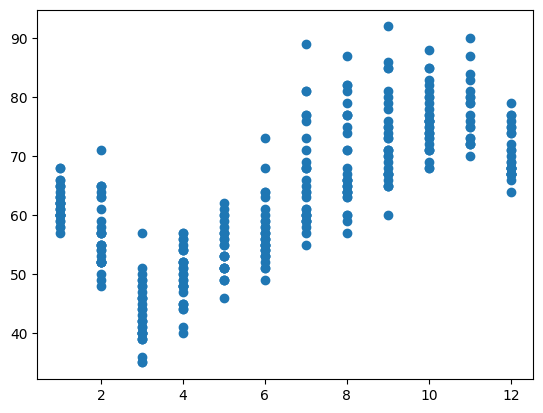

In [13]:
plt.scatter(df['self_month'], df['actual'])

Parece que a meses más altos sube la temperatura. Con la excepción de Enero, Febrero, Noviembre y Diciembre. Parece que tenemos una codificación Ordinal.

In [14]:
df.corr(numeric_only=True)

,year,month,day,temp_2,temp_1,average,actual,friend,week_int,autumn,winter,spring,summer,self_month
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529,0.048145,-0.004352,0.772310,-0.745591,-0.251591,0.228408,-0.170411
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675,0.024592,0.010433,0.011340,0.004328,0.010594,-0.027626,-0.018014
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835,0.583758,0.011480,-0.382375,-0.458992,0.331928,0.531575,0.642092
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880,0.541282,-0.012466,-0.391054,-0.447745,0.333996,0.526819,0.640155
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365,0.689278,-0.002848,-0.434943,-0.523831,0.260625,0.729693,0.798806
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000,0.569145,-0.031188,-0.436088,-0.437172,0.351225,0.545100,0.681100
friend,NaN,0.048145,0.024592,0.583758,0.541282,0.689278,0.569145,1.000000,-0.005890,-0.350818,-0.340658,0.214924,0.498278,0.593650
week_int,NaN,-0.004352,0.010433,0.011480,-0.012466,-0.002848,-0.031188,-0.005890,1.000000,-0.000705,-0.004108,0.002568,0.002319,-0.003377
autumn,NaN,0.772310,0.011340,-0.382375,-0.391054,-0.434943,-0.436088,-0.350818,-0.000705,1.000000,-0.346185,-0.354086,-0.319830,-0.757565


In [15]:
df.groupby('month')['actual'].mean()

month
1     49.741935
2     54.346154
3     57.096774
4     66.266667
5     69.193548
6     73.033333
7     76.225806
8     77.789474
9     70.321429
10    62.000000
11    56.733333
12    43.354839
Name: actual, dtype: float64

In [16]:
df["avg_temp_month_2"]=df.groupby('month')['actual'].transform("mean")
df.describe()
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend,week_int,autumn,winter,spring,summer,self_month,avg_temp_month_2
0,2016,1,1,Fri,45,45,45.6,45,29,5,0,1,0,0,4,49.741935
1,2016,1,2,Sat,44,45,45.7,44,61,6,0,1,0,0,4,49.741935
2,2016,1,3,Sun,45,44,45.8,41,56,7,0,1,0,0,4,49.741935
3,2016,1,4,Mon,44,41,45.9,40,53,1,0,1,0,0,4,49.741935
4,2016,1,5,Tues,41,40,46.0,44,41,2,0,1,0,0,4,49.741935


<Axes: xlabel='avg_temp_month_2', ylabel='actual'>

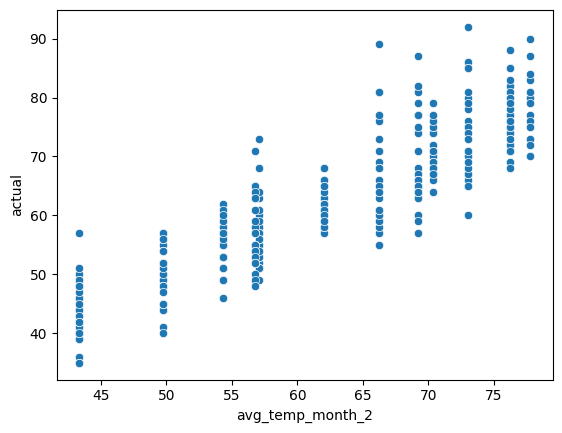

In [ ]:
sns.scatterplot(df,x="avg_temp_month_2",y="actual")

In [18]:
df

,year,month,day,week,temp_2,temp_1,average,actual,friend,week_int,autumn,winter,spring,summer,self_month,avg_temp_month_2
0,2016,1,1,Fri,45,45,45.6,45,29,5,0,1,0,0,4,49.741935
1,2016,1,2,Sat,44,45,45.7,44,61,6,0,1,0,0,4,49.741935
2,2016,1,3,Sun,45,44,45.8,41,56,7,0,1,0,0,4,49.741935
3,2016,1,4,Mon,44,41,45.9,40,53,1,0,1,0,0,4,49.741935
4,2016,1,5,Tues,41,40,46.0,44,41,2,0,1,0,0,4,49.741935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,47,2,1,0,0,0,3,43.354839
344,2016,12,28,Wed,42,47,45.3,48,58,3,1,0,0,0,3,43.354839
345,2016,12,29,Thurs,47,48,45.3,48,65,4,1,0,0,0,3,43.354839
346,2016,12,30,Fri,48,48,45.4,57,42,5,1,0,0,0,3,43.354839


<Axes: >

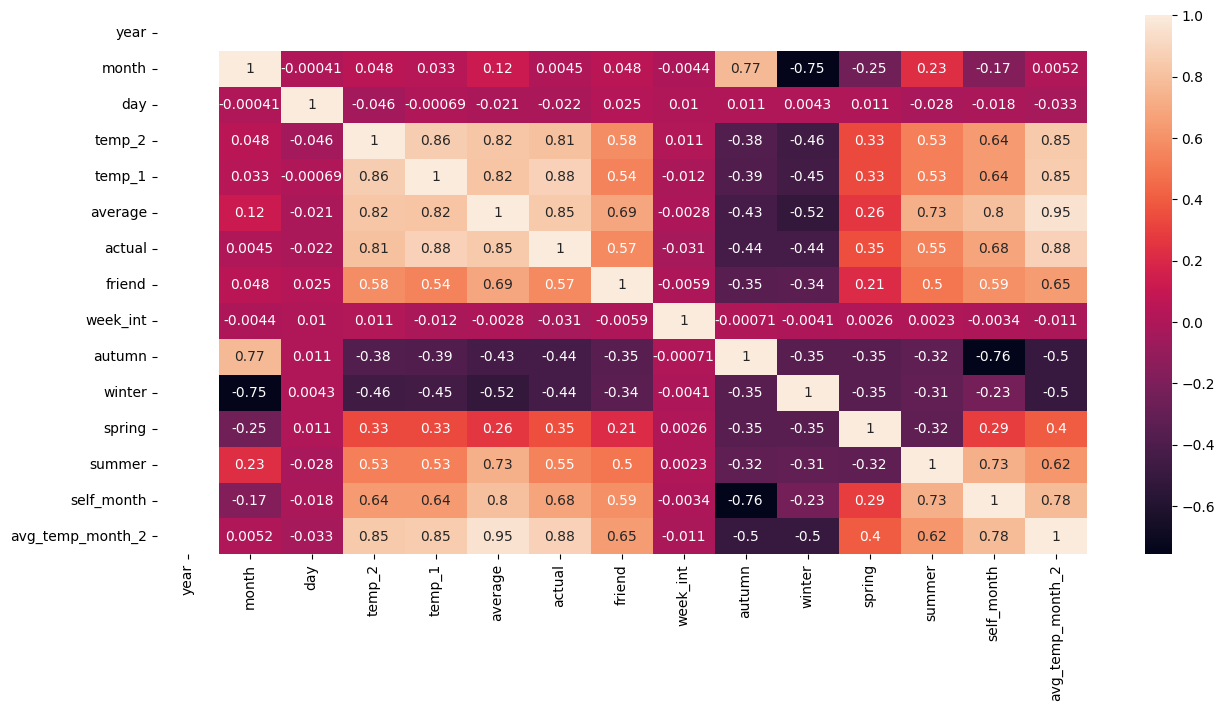

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True), annot=True)

### 3. Selecciona variables y divide en train y test

In [20]:
X = df[["temp_2", "temp_1", "self_month", "avg_temp_month_2", 'average']]
y = df['actual']

No cogemos las de las estaciones porque ya tenemos avg_temp_month y tienen un correlación alta con esa, que es más precisa.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 5)
(70, 5)
(278,)
(70,)


### 4. Entrena el modelo


In [36]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [37]:
dtr.score(X_train, y_train)

1.0

Malo

In [38]:
dtr.score(X_test, y_test)

0.710046355218757

Overfitting en R2

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [39]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_pred = dtr.predict(X_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
dtr.score(X_test,y_test)

MAE 4.9714285714285715
MAPE 0.079622844325629
MSE 40.542857142857144
RMSE 6.367327315511363


0.710046355218757

### 6. Representa el árbol de decisión

In [40]:
from sklearn.tree import plot_tree

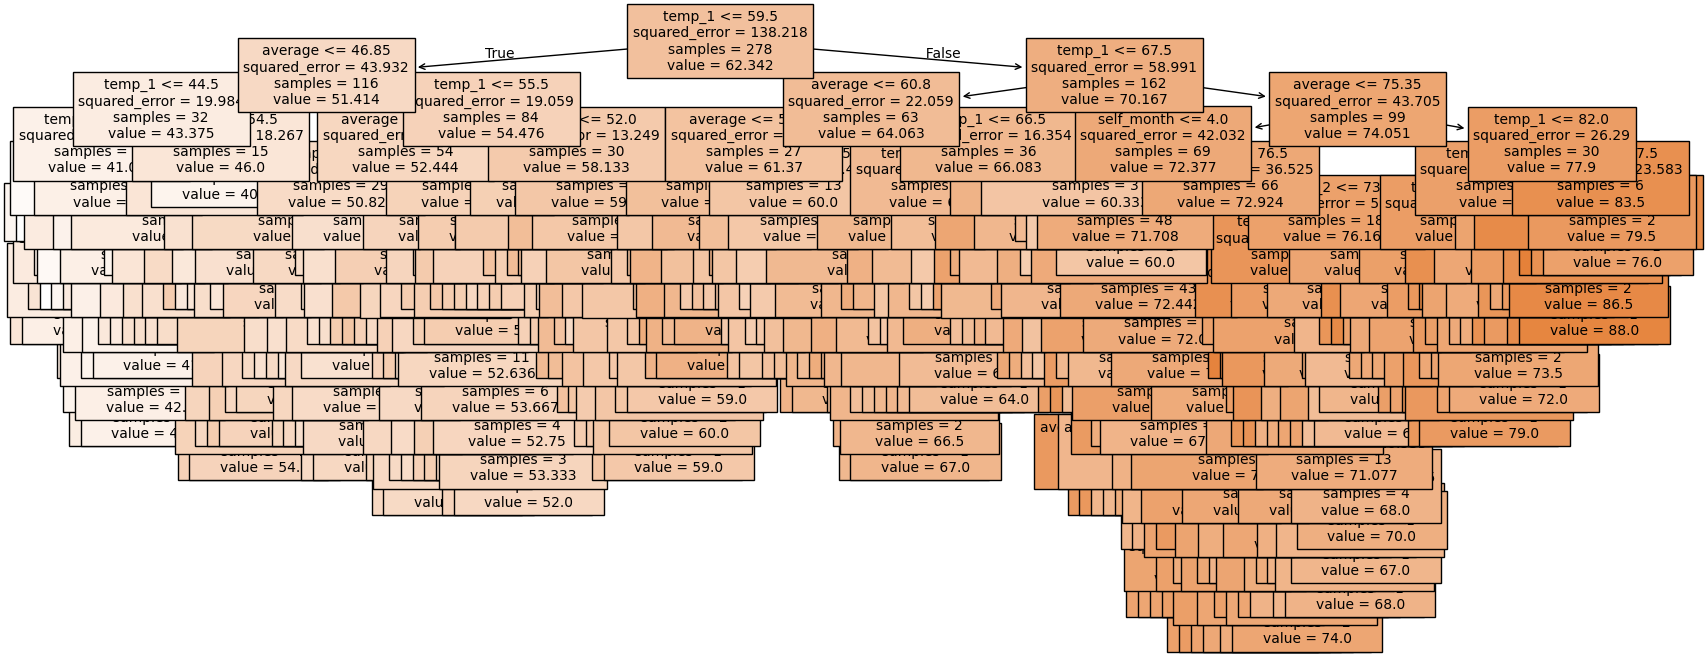

In [41]:
plt.figure(figsize=(20,8))
plot_tree(dtr, fontsize=10, feature_names=X_train.columns, filled=True);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [42]:
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, y_train)

print("R2 train", dtr.score(X_train, y_train))
print("R2 test", dtr.score(X_test, y_test))


R2 train 0.8397458755018086
R2 test 0.7786776796296856


### 8. Vuelve a evaluar tu modelo

In [43]:
y_pred = dtr.predict(X_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 4.267242249556827
MAPE 0.0674392768128964
MSE 30.946461197509944
RMSE 5.5629543587476915


### 9. Vuelve a representar su árbol

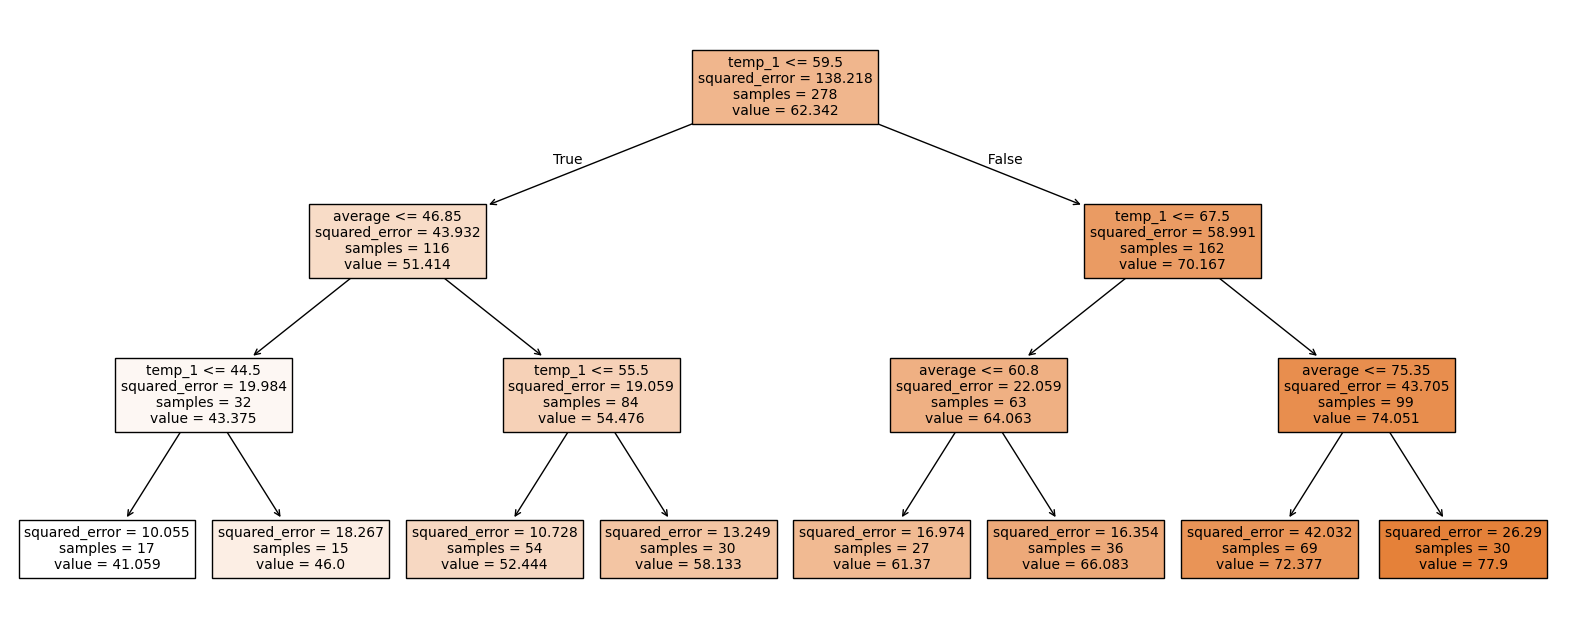

In [44]:
plt.figure(figsize=(20,8))
plot_tree(dtr, fontsize=10, feature_names=X_train.columns, filled=True);

In [45]:
dtr.feature_importances_

array([0.        , 0.88110924, 0.        , 0.        , 0.11889076])

In [46]:
X.columns

Index(['temp_2', 'temp_1', 'self_month', 'avg_temp_month_2', 'average'], dtype='object')

In [47]:
feat = pd.Series(dtr.feature_importances_,index=X.columns)
feat.sort_values(ascending=False)
feat

temp_2              0.000000
temp_1              0.881109
self_month          0.000000
avg_temp_month_2    0.000000
average             0.118891
dtype: float64

La temperatura del día anterior es el mejor predictor.

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
model = DecisionTreeRegressor()

parameters = {
    "max_depth" : [2,3,4,5],
    "min_samples_leaf": [10,20,30],
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

In [50]:
X_train.shape

(278, 5)

In [51]:
dtr_gs.fit(X_train, y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'max_depth': [2, 3, ...], 'min_samples_leaf': [10, 20, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [52]:
dtr_gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 10}

In [53]:
dtr_gs.best_score_

np.float64(-4.109792852635946)

In [54]:
dtr_gs.best_estimator_

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [55]:
best_dtr = dtr_gs.best_estimator_

In [56]:
y_pred = best_dtr.predict(X_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 3.752619628712729
MAPE 0.05993153951020385
MSE 23.528933039948996
RMSE 4.850663154657206


In [57]:
model = DecisionTreeRegressor(max_depth= 5, min_samples_leaf= 10)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [58]:
y_pred = model.predict(X_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 3.8221960698154867
MAPE 0.06057817440018146
MSE 24.588923167229407
RMSE 4.958721928806797


In [59]:
from sklearn.model_selection import cross_val_score

results_cv = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[-3.91590226 -7.10098568 -4.42700153 -3.57225319 -4.30606534]
-4.664441599281551
1.2549697257160894


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [60]:
X.columns

Index(['temp_2', 'temp_1', 'self_month', 'avg_temp_month_2', 'average'], dtype='object')

In [61]:
model.feature_importances_

array([0.        , 0.86817269, 0.        , 0.        , 0.13182731])

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC (59ºF). ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
df['target_c'] = np.where(df['actual']>59, 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend,week_int,autumn,winter,spring,summer,self_month,avg_temp_month_2,target_c
0,2016,1,1,Fri,45,45,45.6,45,29,5,0,1,0,0,4,49.741935,0
1,2016,1,2,Sat,44,45,45.7,44,61,6,0,1,0,0,4,49.741935,0
2,2016,1,3,Sun,45,44,45.8,41,56,7,0,1,0,0,4,49.741935,0
3,2016,1,4,Mon,44,41,45.9,40,53,1,0,1,0,0,4,49.741935,0
4,2016,1,5,Tues,41,40,46.0,44,41,2,0,1,0,0,4,49.741935,0


In [64]:
df['target_c'].value_counts(normalize=True)

target_c
1    0.586207
0    0.413793
Name: proportion, dtype: float64

In [65]:
X = df[['temp_1', "average"]]
y = df['target_c']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(278, 2)
(70, 2)
(278,)
(70,)


In [66]:
model = DecisionTreeClassifier()

parameters = {
    "max_depth" : [2,3,4,5],
    "min_samples_leaf": [10,20,30],
}

dtc_gs = GridSearchCV(model, parameters, cv=5, scoring="precision")

In [67]:
dtc_gs.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [2, 3, ...], 'min_samples_leaf': [10, 20, ...]}"
,scoring,'precision'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [68]:
dtc_gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 10}

In [69]:
dtc_gs.best_score_

np.float64(0.8893271261692315)

In [70]:
dtc_gs.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [71]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
# model = dtc_gs.best_estimator_
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [72]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix

In [73]:
y_pred = model.predict(X_test)

print("Accuracy", model.score(X_test, y_test))
print("AUC", roc_auc_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print("Confusion matrix \n", confusion_matrix(y_test, y_pred))

Accuracy 0.9142857142857143
AUC 0.8988095238095237
Recall 0.9761904761904762
Precision 0.8913043478260869
F1 Score 0.9318181818181818
Confusion matrix 
 [[23  5]
 [ 1 41]]


In [74]:
model.feature_importances_

array([0.09308687, 0.90691313])

<BarContainer object of 2 artists>

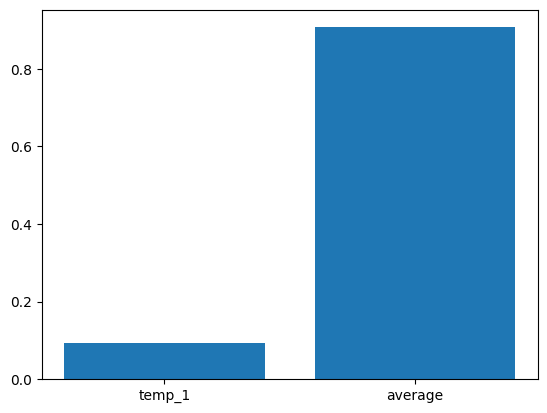

In [75]:
plt.bar(x=X.columns, height = model.feature_importances_)